Parameters:

In [570]:
scale = 56
horizon = 0.1

Statistical parameters:

In [571]:
p = 0.95 

Custom functions:

In [572]:
def wrd_div(n, d):
    return n / d if d else 0

Import libraries:

In [573]:
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
import numpy as np

Read data:

In [574]:
df = pd.ExcelFile('data/data.xlsx').parse('data')
label = ['TLT', 'SPY', 'GOLD', 'REIT']
df.head(0)

,DATE,TLT,SPY,GOLD,REIT


Show number of records:

In [575]:
print('Number of records:', len(df))

Number of records: 783


Format data:

In [576]:
df = df.dropna(how='any', axis=0)
df['DATE'] =  pd.to_datetime(df['DATE']).dt.date

Show time period:

In [577]:
print('Dates:', list(df['DATE'])[0], 'to', list(df['DATE'])[-1])

Dates: 2004-11-15 to 2019-11-08


Drop date feature:

In [578]:
df = df.drop(['DATE'], axis=1) 

Metrics vice horizon:

In [579]:
df_stat, df_hor = [],[]

for i in range(21): 
    
    df_hor.append(0.1*i)
    df_ret = 100*df.apply(np.log).diff(periods=0.1*i*scale)
    
    df_med = df_ret.apply(lambda x : float(round(x.median())))
    df_std = df_ret.apply(lambda x : float(round(x.std())))
    df_var = df_ret[df_ret <= 0].apply(lambda x : float(round(x.abs().quantile(p))))
    
    df_stat.append(pd.DataFrame({'Return': df_med, 'Standard': df_std, 'Value at risk': df_var}))

Define statistics:

In [580]:
ass_ret = []
ass_std = []
ass_var =[]

for item in range(4):
    
    ass_ret.append(list([float(df_stat[x]['Return'].iloc[item]) for x in range(21)]))
    ass_std.append(list([float(df_stat[x]['Standard'].iloc[item]) for x in range(21)]))
    ass_var.append(list([float(df_stat[x]['Value at risk'].iloc[item]) for x in range(21)]))

Sharpe ratio:

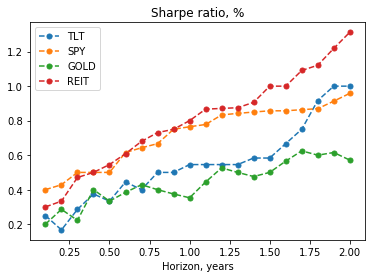

In [586]:
for i in range(4):
    
    z = [wrd_div(x,y) for x, y in zip(ass_ret[i], ass_std[i])][1:] 
    plt.plot(df_hor[1:], z, '--.', label=label[i], markersize=10)

plt.title('Sharpe ratio, %')
plt.xlabel('Horizon, years')
plt.legend(loc='upper left')

plt.show()

Value at risk vice horizon:

In [582]:
voc = {'TLT': ass_var[0], 'SPY': ass_var[1], 'GOLD': ass_var[2]} 
voc.update({'REIT': ass_var[3], 'Horizon': df_hor})

df_var = pd.DataFrame(voc).reset_index(drop=True)
print('\nValue at risk vice horizon:')
HTML(df_var.iloc[::3, :].to_html(index=False))


Value at risk vice horizon:


TLT,SPY,GOLD,REIT,Horizon
0.0,0.0,0.0,0.0,0.0
13.0,31.0,17.0,45.0,0.3
15.0,48.0,23.0,53.0,0.6
15.0,52.0,28.0,51.0,0.9
17.0,60.0,29.0,64.0,1.2
14.0,58.0,31.0,63.0,1.5
11.0,55.0,35.0,55.0,1.8


Median return vice horizon:

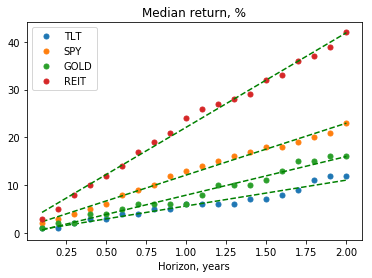

In [583]:
for i in range(4):
    plt.plot(df_hor[1:], ass_ret[i][1:], '.', label=label[i], markersize=10)
    plt.plot(np.unique(df_hor[1:]), np.poly1d(np.polyfit(df_hor[1:], ass_ret[i][1:], 1))(np.unique(df_hor[1:])), '--g')

plt.title('Median return, %')
plt.xlabel('Horizon, years')
plt.legend(loc='upper left')

plt.show()